In [624]:
DIR = "/Users/damoncrockett/Desktop/small/"

In [625]:
DATA = DIR+"whole_metadata.csv"

In [626]:
import pandas as pd
d = pd.read_csv(DATA)

In [627]:
d.head()

,filename,hsd,hue_mean,sat_mean,val_mean,base
0,/Users/damoncrockett/Desktop/small/p212/0000cf...,0.374423,0.595871,0.225859,0.417203,0000cf3eb76911e3aea30e0a45d706d2_8.jpg
1,/Users/damoncrockett/Desktop/small/p212/000287...,0.346415,0.572209,0.229280,0.519352,000287a4b4a611e387960ee8fbc8973c_8.jpg
2,/Users/damoncrockett/Desktop/small/p212/000dc3...,0.374720,0.290403,0.502587,0.542885,000dc354b85111e3abea12c3758099f3_8.jpg
3,/Users/damoncrockett/Desktop/small/p212/001651...,0.346492,0.378924,0.229229,0.418924,00165196a61c11e3bfa312a0ed1ac256_8.jpg
4,/Users/damoncrockett/Desktop/small/p212/001b7f...,0.306901,0.625505,0.214986,0.611959,001b7fb6a96611e3bb610e61fa614c2b_8.jpg


In [628]:
d = d[d.sat_mean > 0.5]

In [629]:
u = d.sample(n=1024)

In [630]:
u.reset_index(drop=True,inplace=True)

####PROJECTION TO 2D

In [631]:
from sklearn.decomposition import RandomizedPCA as pca
from sklearn.manifold import TSNE as tsne

#pca = pca(n_components=2)
tsne = tsne(n_components=2)

X = u.iloc[:,1:5].as_matrix()

#pca.fit(X)
tsne.fit(X)

In [632]:
#subspace_pca = pd.DataFrame(pca.transform(X),columns=["x","y"])
subspace_tsne = pd.DataFrame(tsne.fit_transform(X),columns=["x","y"])

In [633]:
%matplotlib inline
import matplotlib.pyplot as plt

In [634]:
#x = subspace_pca.x
#y = subspace_pca.y
#fig, ax = plt.subplots(figsize=(4,4))
#ax.scatter(x, y)

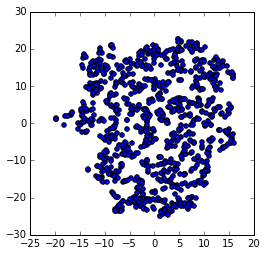

In [635]:
x = subspace_tsne.x
y = subspace_tsne.y
fig, ax = plt.subplots(figsize=(4,4))
ax.scatter(x, y)

####BIN

In [658]:
num_bins = 12

In [659]:
subspace_tsne['grid_x'] = pd.cut(subspace_tsne['x'],num_bins,labels=False)
subspace_tsne['grid_y'] = pd.cut(subspace_tsne['y'],num_bins,labels=False)

####ADD PATHS

In [660]:
subspace_tsne['local_path'] = u.filename

####PLOT

In [661]:
n = len(subspace_tsne.index)

In [662]:
from PIL import Image

In [663]:
thumb_side = 64

In [664]:
grid_side = num_bins

In [665]:
px_w = thumb_side * grid_side
px_h = thumb_side * grid_side

In [666]:
canvas = Image.new('RGB',(px_w,px_h),(255,255,255))

In [667]:
for i in range(n):
    im = Image.open(subspace_tsne.local_path.loc[i])
    im.thumbnail((thumb_side,thumb_side),Image.ANTIALIAS)
    x = subspace_tsne.grid_x.loc[i] * thumb_side
    y = subspace_tsne.grid_y.loc[i] * thumb_side
    canvas.paste(im,(x,y))

In [668]:
canvas.save("/Users/damoncrockett/Desktop/small/"+str(num_bins)+".png")